<a href="https://colab.research.google.com/github/pbcquoc/vietocr/blob/master/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inference

In [1]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

/home/vms/miniconda3/envs/vietocr/lib/python3.12/site-packages/gdown/__init__.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [2]:
config = Cfg.load_config_from_name('vgg_transformer')

Config file vietocr/config/base.yml exists. Loading from local file.
Config file vietocr/config/vgg-transformer.yml exists. Loading from local file.


Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [3]:
# config['weights'] = './weights/transformerocr.pth'
config['cnn']['pretrained']=False
config['device'] = 'cuda:0'

In [4]:
detector = Predictor(config)

/home/vms/miniconda3/envs/mineru/lib/python3.12/site-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


.pth file already exists in vietocr/downloaded_models: vgg_transformer.pth


'Độc lập - Tự do - Hạnh phúc'

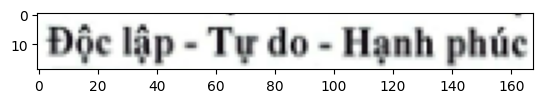

In [5]:
img = '../dataset/images_filtered/0af5a116-210b-40b6-9052-34ef858ce80b_Signed_page_1_3.png'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [7]:
!pip install prefetch_generator

  Preparing metadata (setup.py) ... done
  DEPRECATION: Building 'prefetch_generator' using the legacy setup.py bdist_wheel mechanism, which will be removed in a future version. pip 25.3 will enforce this behaviour change. A possible replacement is to use the standardized build interface by setting the `--use-pep517` option, (possibly combined with `--no-build-isolation`), or adding a `pyproject.toml` file to the source tree of 'prefetch_generator'. Discussion can be found at https://github.com/pypa/pip/issues/6334
  Created wheel for prefetch_generator: filename=prefetch_generator-1.0.3-py3-none-any.whl size=4798 sha256=13239b057b0a7a3d6738c55670b5a4507483d95cc78cf84003453401ddf4f9f1
  Stored in directory: /home/vms/.cache/pip/wheels/23/88/c7/3b5afc342fc80a599ce41ba9000cf8a71261991c35cf088edf
Successfully built prefetch_generator


In [2]:
!pip install -U jupyterlab ipywidgets

  Using cached argon2_cffi-25.1.0-py3-none-any.whl.metadata (4.1 kB)
  Using cached prometheus_client-0.23.1-py3-none-any.whl.metadata (1.9 kB)
  Using cached jsonschema-4.25.1-py3-none-any.whl.metadata (7.6 kB)
  Using cached argon2_cffi_bindings-25.1.0-cp39-abi3-manylinux_2_26_x86_64.manylinux_2_28_x86_64.whl.metadata (7.4 kB)
  Using cached attrs-25.3.0-py3-none-any.whl.metadata (10 kB)
  Using cached jsonschema_specifications-2025.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached referencing-0.36.2-py3-none-any.whl.metadata (2.8 kB)
  Using cached rpds_py-0.27.1-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.2 kB)
  Using cached python_json_logger-3.3.0-py3-none-any.whl.metadata (4.0 kB)
  Using cached jsonpointer-3.0.0-py2.py3-none-any.whl.metadata (2.3 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl.metadata (32 kB)
  Using cached webencodings-0.5.1-py2.py3-none-any.whl.metadata (2.1 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB

In [3]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [4]:
config = Cfg.load_config_from_name('vgg_transformer')

Config file vietocr/config/base.yml exists. Loading from local file.
Config file vietocr/config/vgg-transformer.yml exists. Loading from local file.


In [5]:

dataset_params = {
    'name':'hw',
    'data_root':'../dataset/images_filtered',
    'train_annotation':'train_annotations_filtered.txt',
    'valid_annotation':'test_annotations_filtered.txt'
}

params = {
         'batch_size': 64,
         'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
         'print_every':200,
         'valid_every':15*200,
          'iters':20000,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 10000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cuda:0'

you can change any of these params in this full list below

In [6]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cuda:0',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 64,
  'print_every': 200,
  'valid_every': 3000,
  'iters': 20000,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 10000,
  'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456

You should train model from our pretrained 

In [7]:
trainer = Trainer(config, pretrained=True)

/home/vms/miniconda3/envs/mineru/lib/python3.12/site-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


.pth file already exists in vietocr/downloaded_models: vgg_transformer.pth
train_hw exists. Remove folder if you want to create new dataset


train_hw build cluster: 100%|███████████████████████████| 121018/121018 [00:00<00:00, 441000.50it/s]

valid_hw exists. Remove folder if you want to create new dataset



valid_hw build cluster: 100%|█████████████████████████████| 30251/30251 [00:00<00:00, 447203.40it/s]


Save model configuration for inference, load_config_from_file

In [8]:
trainer.config.save('custom_config_01102025.yml')

Visualize your dataset to check data augmentation is appropriate

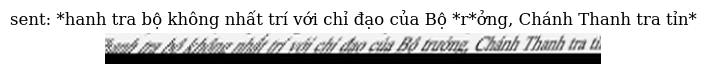

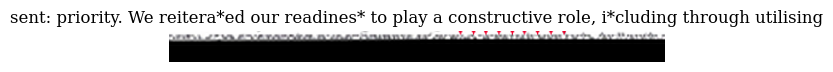

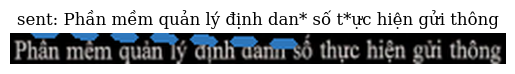

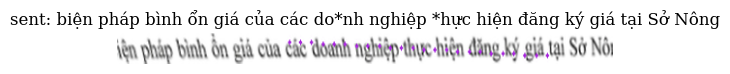

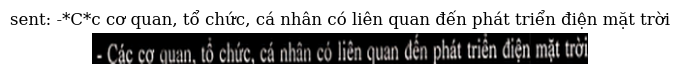

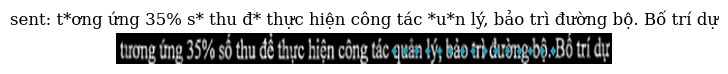

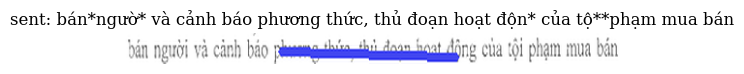

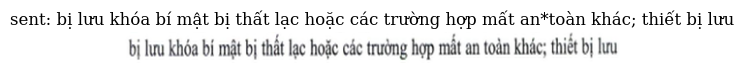

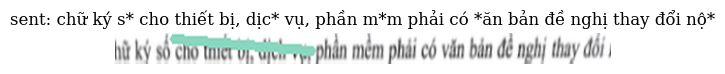

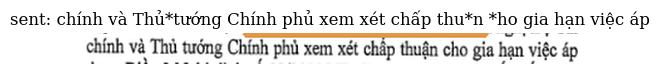

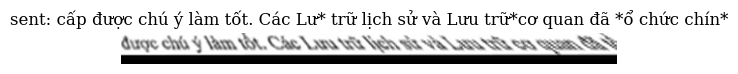

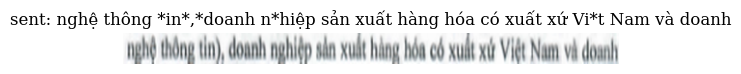

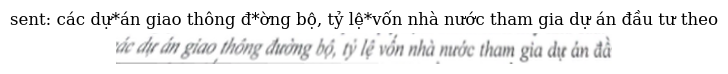

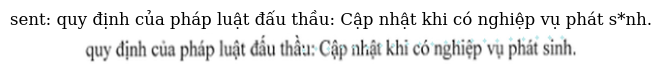

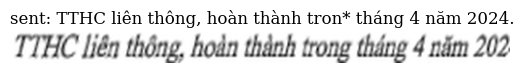

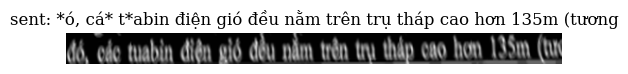

In [9]:
trainer.visualize_dataset()

Train now

In [10]:
trainer.train()

iter: 000200 - train loss: 0.756 - lr: 1.91e-05 - load time: 0.06 - gpu time: 29.40
iter: 000400 - train loss: 0.680 - lr: 3.95e-05 - load time: 0.03 - gpu time: 29.38
iter: 000600 - train loss: 0.673 - lr: 7.14e-05 - load time: 0.03 - gpu time: 28.23
iter: 000800 - train loss: 0.672 - lr: 1.12e-04 - load time: 0.03 - gpu time: 29.31
iter: 001000 - train loss: 0.630 - lr: 1.56e-04 - load time: 0.03 - gpu time: 28.01
iter: 001200 - train loss: 0.636 - lr: 2.01e-04 - load time: 0.03 - gpu time: 28.68
iter: 001400 - train loss: 0.648 - lr: 2.41e-04 - load time: 0.03 - gpu time: 30.07
iter: 001600 - train loss: 0.655 - lr: 2.73e-04 - load time: 0.03 - gpu time: 31.80
iter: 001800 - train loss: 0.646 - lr: 2.93e-04 - load time: 0.03 - gpu time: 31.71
iter: 002000 - train loss: 0.623 - lr: 3.00e-04 - load time: 0.16 - gpu time: 30.89
iter: 002200 - train loss: 0.639 - lr: 3.00e-04 - load time: 0.03 - gpu time: 32.43
iter: 002400 - train loss: 0.620 - lr: 3.00e-04 - load time: 0.03 - gpu time

/home/vms/hungtrieu07/ocr/vietocr/vietocr/tool/translate.py:159: RuntimeWarning: invalid value encountered in divide
  char_probs = np.sum(char_probs, axis=-1) / (char_probs > 0).sum(-1)


iter: 012000 - valid loss: 0.545 - acc full seq: 0.7717 - acc per char: 0.9509
iter: 012200 - train loss: 0.555 - lr: 1.19e-04 - load time: 0.03 - gpu time: 28.93
iter: 012400 - train loss: 0.567 - lr: 1.14e-04 - load time: 0.03 - gpu time: 28.43
iter: 012600 - train loss: 0.580 - lr: 1.09e-04 - load time: 0.03 - gpu time: 30.74
iter: 012800 - train loss: 0.575 - lr: 1.04e-04 - load time: 0.03 - gpu time: 28.71
iter: 013000 - train loss: 0.589 - lr: 9.87e-05 - load time: 0.03 - gpu time: 31.93
iter: 013200 - train loss: 0.582 - lr: 9.38e-05 - load time: 0.18 - gpu time: 31.40
iter: 013400 - train loss: 0.558 - lr: 8.90e-05 - load time: 0.03 - gpu time: 29.80
iter: 013600 - train loss: 0.585 - lr: 8.42e-05 - load time: 0.03 - gpu time: 30.53
iter: 013800 - train loss: 0.569 - lr: 7.96e-05 - load time: 0.03 - gpu time: 29.41
iter: 014000 - train loss: 0.566 - lr: 7.50e-05 - load time: 0.03 - gpu time: 29.13
iter: 014200 - train loss: 0.569 - lr: 7.05e-05 - load time: 0.02 - gpu time: 29.

Visualize prediction from our trained model


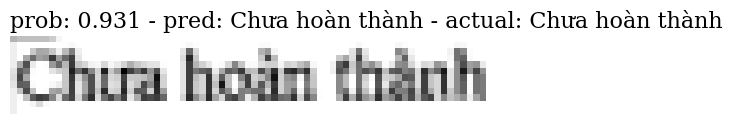

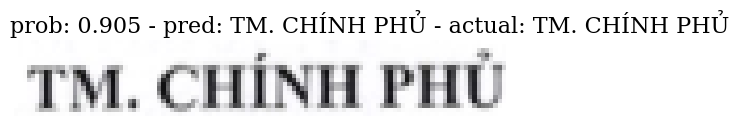

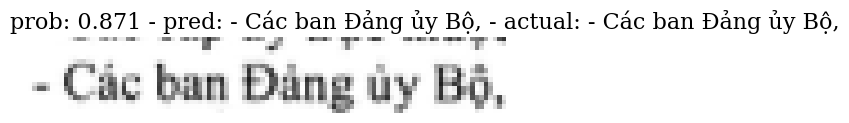

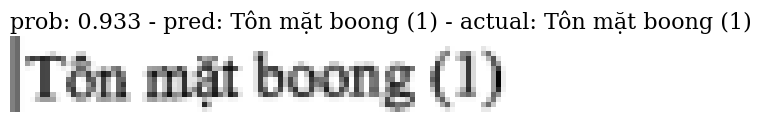

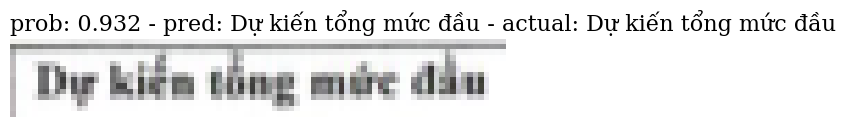

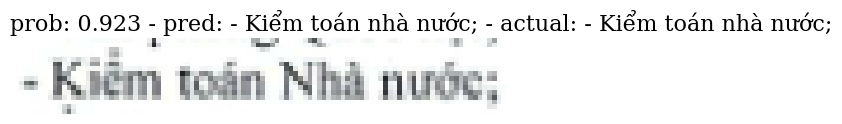

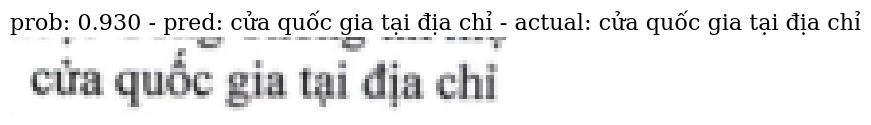

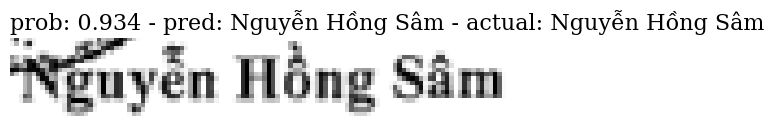

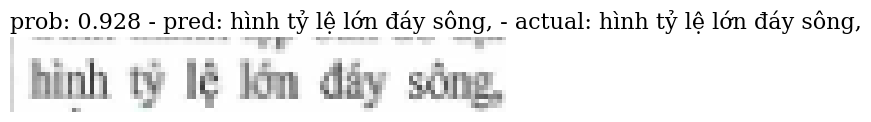

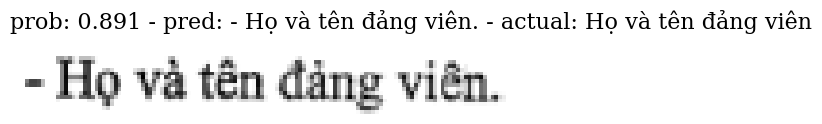

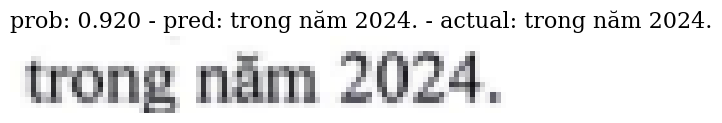

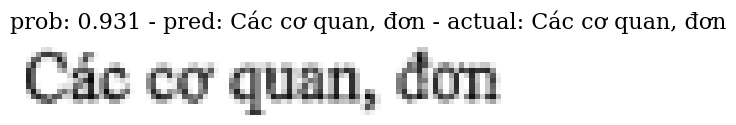

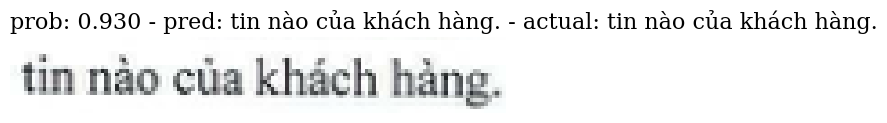

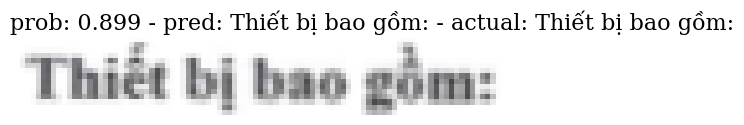

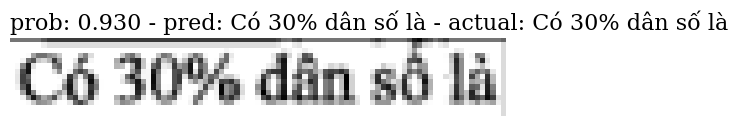

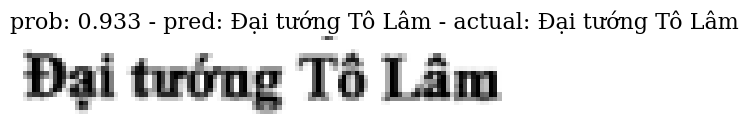

In [11]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [12]:
trainer.precision()

(0.7845707494407159, np.float32(0.95231134))